### Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Целевая переменная — пол спортсмена. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. 

1. Преобразуйте данные:
* проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
* закодируйте категориальные переменные числовыми значениями по необходимости.

In [368]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [370]:
# Ключевые показатели для предсказания переменной sex - рост и вес
# Удалим пропуски, так как корректно по имеющимся признакам восстановить переменные height, weight сложно

data.dropna(subset=['height', 'weight'], inplace=True)

2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

In [371]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['sex_encoder'] = le.fit_transform(data['sex'])
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,sex_encoder
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,1
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,1
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,1


In [372]:
X = data[['height', 'weight']]
y = data['sex_encoder']

In [373]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [374]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [375]:
predictions = model.predict_proba(X_test)[:, 1]
predictions

array([0.5901047 , 0.96891302, 0.1546708 , ..., 0.94914028, 0.20690885,
       0.52125557])

In [376]:
model.score(X_train, y_train)

0.7736587612249597

In [377]:
model.score(X_test, y_test)

0.7767034990791897

3. Постройте ROC-кривую с помощью функции roc_curve из библиотеки sklearn.metrics.

In [378]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [390]:
cm

array([[738, 246],
       [239, 949]])

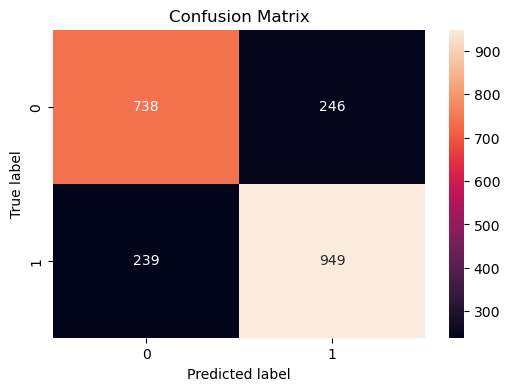

In [379]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [380]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predictions)

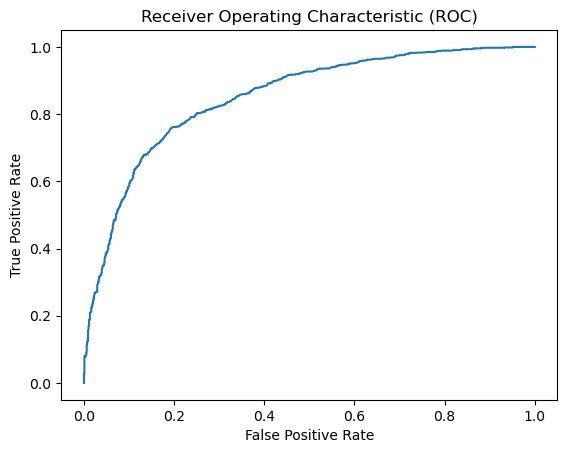

In [381]:
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.show()

4. Вычислите значение ROC-AUC метрики с помощью функции roc_auc_score из библиотеки sklearn.metrics.

In [382]:
from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)
roc_auc

0.8505357607237688

5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [383]:
y_test

36      1
7675    1
9226    1
6362    1
7489    1
       ..
9434    1
3802    1
9048    1
647     0
3002    1
Name: sex_encoder, Length: 2172, dtype: int64

In [384]:
predictions

array([0.5901047 , 0.96891302, 0.1546708 , ..., 0.94914028, 0.20690885,
       0.52125557])

In [385]:
threshold = 0.5

predict_class = (predictions >= threshold).astype(int)
predict_class

array([1, 1, 0, ..., 1, 0, 1])

In [386]:
# Рассчитаем TP, FP, FN, TN 
TP = np.sum((predict_class == 1) & (y_test == 1))
FP = np.sum((predict_class == 1) & (y_test == 0))
FN = np.sum((predict_class == 0) & (y_test == 1))
TN = np.sum((predict_class == 0) & (y_test == 0))

# Теперь TPR и FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

In [387]:
print(f"TPR: {TPR:.3f}, FPR: {FPR}")

TPR: 0.799, FPR: 0.25


6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик. Объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

In [338]:
thresholds = np.linspace(0, 1, 100)

tpr = []
fpr = []

for threshold in thresholds:
    predict_class = (predictions >= threshold).astype(int)
    TP = np.sum((predict_class == 1) & (y_test == 1))
    FP = np.sum((predict_class == 1) & (y_test == 0))
    FN = np.sum((predict_class == 0) & (y_test == 1))
    TN = np.sum((predict_class == 0) & (y_test == 0))
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    tpr.append(TPR)
    fpr.append(FPR)

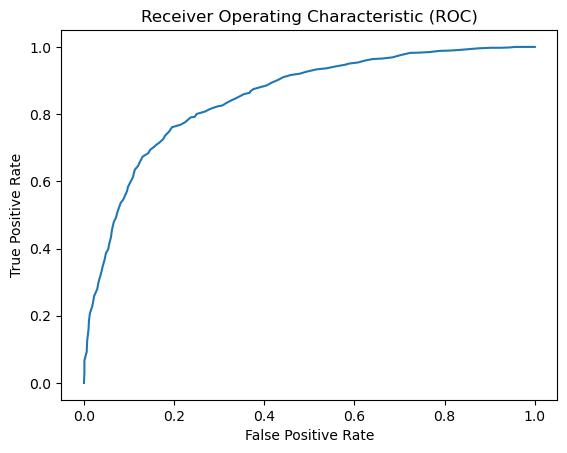

In [339]:
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.show()

7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

In [340]:
thresholds = np.linspace(0, 0.99, 1000)

precision_list = []
recall_list = []

for threshold in thresholds:
    predict_class = (predictions >= threshold).astype(int)
    TP = np.sum((predict_class == 1) & (y_test == 1))
    FP = np.sum((predict_class == 1) & (y_test == 0))
    FN = np.sum((predict_class == 0) & (y_test == 1))
    TN = np.sum((predict_class == 0) & (y_test == 0))
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall_TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    precision_list.append(precision)
    recall_list.append(recall_TPR)

# Кривая начинается с точки (0,1)
precision_list.append(1)
recall_list.append(0)

In [341]:
precision_list[-5:]

[0.9787234042553191,
 0.9777777777777777,
 0.9761904761904762,
 0.9736842105263158,
 1]

In [342]:
recall_list[-5:]

[0.03872053872053872,
 0.037037037037037035,
 0.034511784511784514,
 0.031144781144781145,
 0]

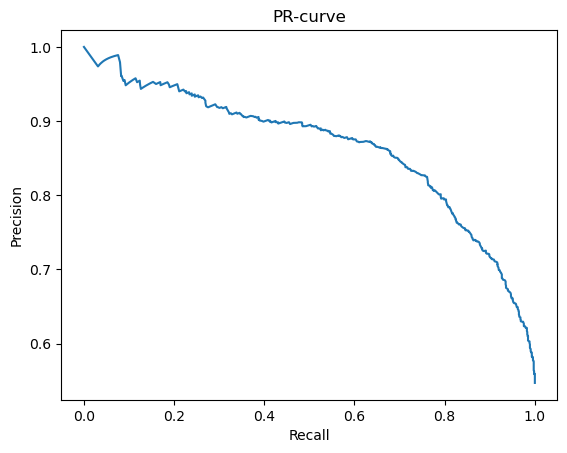

In [343]:
plt.plot(recall_list, precision_list, label='PR-curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-curve')
plt.show()

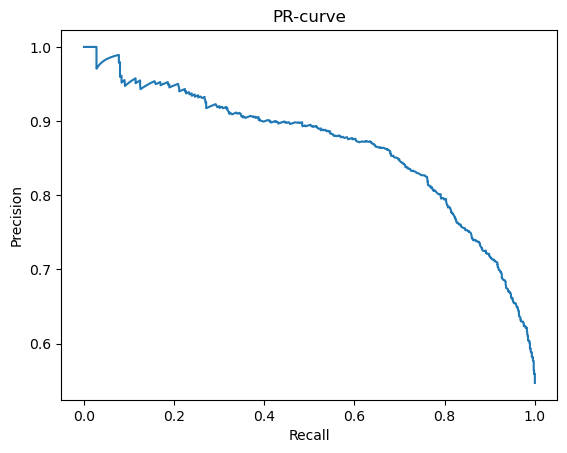

In [344]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, predictions)

plt.plot(recall, precision, label='PR-curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-curve')
plt.show()

8. Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

In [388]:
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC: {roc_auc:.3f}")

ROC-AUC: 0.851


9. Сформулируйте выводы по проделанной работе:
* как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
* может ли ROC-кривая проходить ниже диагонали?

In [396]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 77.67%


In [400]:
print(f"Матрица ошибок:\n{cm}")

Матрица ошибок:
[[738 246]
 [239 949]]


In [402]:
TP, FP, TN, FN

(949, 246, 738, 239)

* Согласно матрице ошибок модель хорошо распознает положительный класс: TP — 949, и отрицательный: TN — 738.
* Общая точность также показывает неплохой результат - 77%.
* В данном примере ROC-кривая не может быть ниже диагонали. При ROC-AUC = 50% полученная модель не лучше случайного угадывания. В нашем случае значение ROC-AUC = 85%. График кривой ROC и значение ROC-AUC показывают эффективность модели.